## <span style="color:#0073C0">Question 2.4</span>
A bungee jumper wishes to try something new (!). He wants to start with the bungee cord strung out horizontally from an attachment and swing down in an arc. Obviously the cord is elastic and will extend during the swing. Consider the dynamic model for this system shown in figure 1. $AB$ is an uniform rigid bar pivoted at point $A$ and with negligible mass. Mass $M$ represents the jumper and slides on the bar (no friction) supported from $A$ by the bungee cord (spring stiffness $K$ and initial length $a$). Obtain the equations of motion of the system considering it is released from the horizontal position at time $t=0$.

<p align="center">
    <img src="resources/Q2_4.jpg" width="400"> 
</p>
<p></p>
<center>Figure 1: Dynamic model of a bungee jumper, for Question 2.4.</center>

    
## <span style="color:#0073C0">Example Solution</span>
Let us start by considering that $a$ is the initial length of the spring (bungee cord) and that at the start $\theta=0$ and $x=0$. After time $t$ the mass has a radial velocity ̇$x$ which is the velocity of $m$ relative to the bar. The tangential component of the velocity is $(a+x)\dot{\theta}$. Consequently, the kinetic energy of the system is
$$ T = \frac{1}{2}m\left[\dot{x}^2+(a+x)^2\dot{\theta}^2\right] $$
The potential energy of the system is
$$V = \frac{1}{2}kx^2-mg(a+x)sin\theta$$
As there is no drag, there is no generalised force on the system and Lagrange’s equations are

$$\frac{\mathrm{d}}{\mathrm{d}t}\left(\frac{\partial T}{\partial \dot{x}}\right)-\frac{\partial T}{\partial x} + \frac{\partial V}{\partial x} = 0$$

$$\frac{\mathrm{d}}{\mathrm{d}t}\left(\frac{\partial T}{\partial \dot{\theta}}\right)-\frac{\partial T}{\partial \theta} + \frac{\partial \theta}{\partial x} = 0$$

Differentiating the energy expressions leads to

$$\frac{\partial T}{\partial \dot{\theta}}=m(a+x)^2\dot{\theta}\; \quad \frac{\mathrm{d}}{\mathrm{d}t}\left(\frac{\partial T}{\partial \dot{\theta}}\right) = m(a+x)^2\ddot{\theta} + 2m(a+x)^2\dot{x}\dot{\theta}; \quad \frac{\partial T}{\partial \theta}=0$$

$$\frac{\partial T}{\partial \dot{x}}=m\dot{x}\; \quad \frac{\mathrm{d}}{\mathrm{d}t}\left(\frac{\partial T}{\partial \dot{x}}\right) = m\ddot{x}\; \quad \frac{\partial T}{\partial x}=m(a+x)\dot{\theta}^2$$

$$ \frac{\partial V}{\partial \theta}=-mg(a+x)\cos\theta $$

$$ \frac{\partial V}{\partial x}=kx - mg\sin\theta $$

Consequently, the equations of motion for this system are:

$$m(a+x)^2\ddot{\theta} + 2m(a+x)\dot{x}\dot{\theta}-mg(a+x)\cos\theta=0$$
$$m\ddot{x}-m(a+x)\dot{\theta}^2+kx-mg\sin{\theta}=0$$

## <span style="color:#0073C0">Interactive visualisation</span>
To see what the motion of the bungee jumper actually looks like, we need to solve the equation of motion for the system that we just derived, which is a second order differential equation. Remember, to sit the exam for this course we won't have to solve any differential equations, we are just doing this here so that we can get a visualisation of the pendulum motion.  

First let's import the Python libraries that we will need:

In [1]:
%matplotlib ipympl
from scipy.integrate import odeint
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.animation as animation

### Customisation
To solve this, we need to track four parameters, the linear and angular positions and velocities of mass $m$. To do this we create an array `y` with four elements, to store these four parameters. Now we define the initial conditions, which can be changed to study the behaviour of the system in different conditions:
 - $N$ (`N`) is the total number of steps, change this to increase/decrease resolution of your plot;
 - $a$ (`aa`) [m] is the unstreched length of the bungee cable;
 - $x_0$ (`x_0`) [m] is the initial strech of the cable;
 - $v_0$ (`v_0`) [m/s] is the initial (release) velocity;
 - $\theta_0$ (`theta_0`) [rad] is the initial (release) angle; and
 - $\omega_0$ (`omega_0`) [rad] is the initial (release) angular velocity.

In [2]:
y = np.zeros([4])

aa = 3  
x_0 = 1.0
v_0 = 0.0
theta_0 = 0
omega_0 = 0.0

y[0] = x_0
y[1] = v_0
y[2] = theta_0
y[3] = omega_0

It is also necessary to define the remaining variables and constants in the equations of motion:
 - $t$ (`time`) is the time space for the calculations [s];
 - $k$ (`k`) is the cable stiffness (spring constant) [N/m];
 - $m$ (`m`) is the mass of the jumper [kg]; and
 - $g$ (`gravity`) is the acceleration of gravity [m/s$^2$].

In [3]:
k = 150.0
m = 70.0
gravity = 9.8

### Solution

The equations of motion of the system can be algebraically manipulated and rewritten as

$$ \ddot\theta = \frac{\mathrm{d}^2\theta}{\mathrm{d}t^2} = \frac{1}{(a+x)}\left[g\cos\theta - 2\left(\frac{\mathrm{d}x}{\mathrm{d}t}\right)\left(\frac{\mathrm{d}\theta}{\mathrm{d}t}\right)\right] $$

$$ \ddot x = \frac{\mathrm{d}^2x}{\mathrm{d}t^2}  = (a+x)\left(\frac{\mathrm{d}\theta}{\mathrm{d}t}\right)^2 - \frac{k}{m}x + g\sin\theta $$

The `spring_pendulum` function defines this set of differential equations:

In [4]:
# Set range of times to solve equations over
t_start = 0 
t_end = 25
N = (t_end - t_start) * 30 
time = np.linspace(t_start, t_end, N)  


"""
The pendulum equations of motion to be solved by the "odeint" function
"""
def spring_pendulum(y, time):
    g0 = y[1]
    g1 = (aa + y[0])*y[3]*y[3] - k/m*y[0] + gravity*np.sin(y[2])
    g2 = y[3]
    g3 = (gravity*np.cos(y[2]) - 2.0*y[1]*y[3])/(aa + y[0])
    
    return np.array([g0, g1, g2, g3])

Now we find the solution to the equations of motion using the `odeint` python module from `scipy`. This module can be used to integrate a system of ordinary differential equations. You can find more information about this module in this <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html">Link</a>.

In [5]:
# Solve differential equations
answer = odeint(spring_pendulum, y, time)

# Calculate x and y coordinates
xdata = (aa + answer[:,0])*np.cos(answer[:,2])
ydata = -(aa + answer[:,0])*np.sin(answer[:,2])
xIn = (aa+x_0)*np.cos(theta_0)
yIn = -(aa+x_0)*np.sin(theta_0)

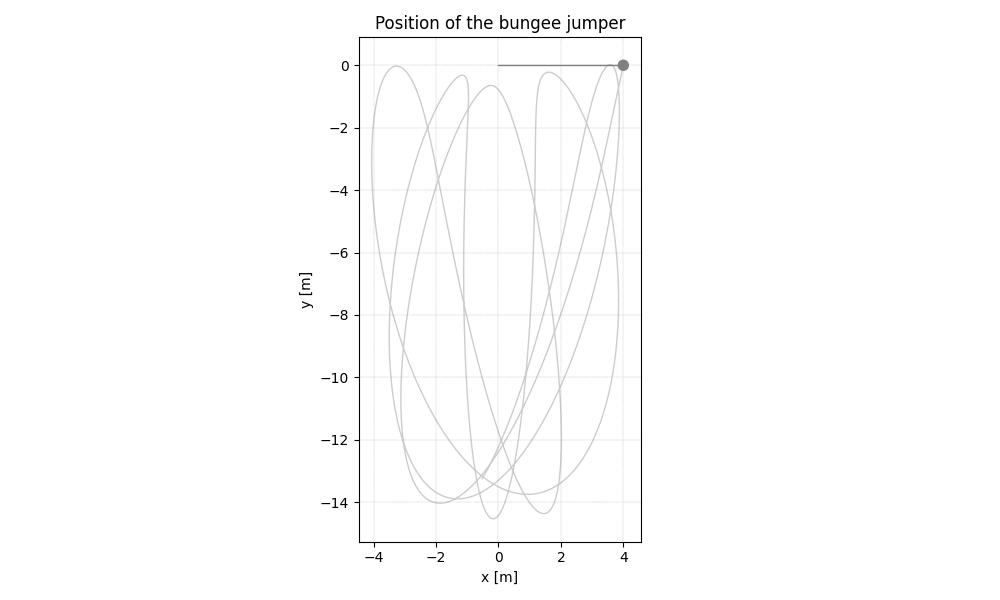

In [9]:
"""
The initialisation function called by animation.FuncAnimation.
"""
def init():
    cable.set_data([], [])
    line2.set_data([], [])
    circle.radius = circ_size
    circle.center = xpos, ypos
    return cable, line2, circle
   
"""
The function called by animation.FuncAnimation.This sets the cable and circle position and traces
the circle's positional history.
"""
def animate(i):
    cable.set_xdata((0,xdata[i]))
    cable.set_ydata((0,ydata[i]))
    circ_size_local = 0.04*(aa+x_0)
    circle.center = xdata[i], ydata[i]
    line2, = ax_an.plot(xdata[i-1:i+1], ydata[i-1:i+1], color='#0073C0', linewidth=0.5)
    return cable, line2, circle

#Setting up the figure
fig = plt.figure(figsize=(10,6))

#Setting up axes 2 with an initial plot (might not be needed)
ax_an = fig.add_subplot(1, 1, 1)
ax_an.set_aspect('equal')
rmax = aa+x_0
xpos = (rmax)*np.cos(-theta_0)
ypos = (rmax)*np.sin(-theta_0)
cable, = ax_an.plot((0,xpos), (0,ypos), 'grey', linewidth=1., zorder=2)
back_line, = ax_an.plot(xdata, ydata, 'grey', linewidth=1., alpha=0.4, zorder=1)
ckwags = {"fill": True, "color": "grey"}
circ_size = 0.04*(aa+x_0)
circle = ax_an.add_patch(mpl.patches.Circle((xpos,ypos),circ_size,zorder=3,**ckwags))
plt.grid(color='grey', linestyle=':', linewidth=0.3)
# ax_an.set_aspect('equal') #Uncomment this line to make the aspect equal (figure changes size)
ax_an.relim()
ax_an.autoscale_view()
line2, = ax_an.plot(xdata[0], ydata[0], color='#0073C0', linewidth=0.5)
ax_an.set_xlabel('x [m]')
ax_an.set_ylabel('y [m]')
plt.title('Position of the bungee jumper')
plt.tight_layout()

# Setting up the animation function, giving it the figure handle and "animate" function as arguments
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=N, interval=(t_end-t_start)/N*1000, blit=True, cache_frame_data=False)

In [8]:
# Export to video
# from IPython.display import HTML
# HTML(ani.to_html5_video())